In [ ]:
!pip install langgraph

In [5]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, START, END
import random

In [6]:
class AgentState(TypedDict):
  name: str
  number: List[str]
  counter: int

In [7]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
  """Generate Loop"""
  state["counter"]+=1
  state["number"].append(random.randint(0, 10))

  return state

def should_continue(state: AgentState)-> AgentState:
  if state["counter"]<5:
    return "loop"
  return "exit"


In [17]:
graph = StateGraph(AgentState)

graph.add_node("greeting",greeting_node)
graph.add_node("loop", random_node)

graph.add_edge(START,"greeting")
graph.add_edge("greeting","loop")
graph.add_conditional_edges(
    "loop",
    should_continue,
    {
        "loop": "loop",
        "exit": END
    }

)

app = graph.compile()

In [15]:
from IPython.display import Image, display

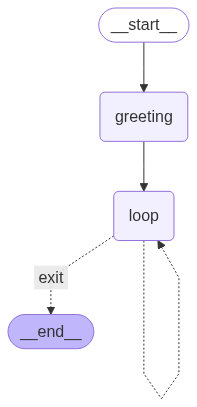

In [18]:
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
result = app.invoke({
    "name":"Ashish",
    "number":[],
    "counter": -10
})

In [20]:
result

{'name': 'Hi there, Ashish', 'number': [5, 0, 9, 5, 4], 'counter': 5}